# Test 2 : compare SBS sigmut, INDEL sigmut, SBS + INDEL sigmut
Here, we compare, for GCN classifier with Tumour type pre-graph, the case where we SBS mutational signatures, INDEL mutational signatures, and the combination of both. No normalization of mutational signatures.

## Table of contents

1. [SBS sigmut](#1-sbs)
2. [INDEL sigmut](#2-indel)
2. [SBS + INDEL](#2-sbs-indel)
4. [Evaluate performances](#4-performances)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from evaluation.ClassificationMetrics import ClassificationMetrics

from manage.GCNClassifierTrainTestManager import GCNClassifierTrainTestManager

from models.GCNClassifier import GCNClassifier

from sklearn.preprocessing import StandardScaler

from utils.preProcessing import preProcessing

## 0. Reading and preprocessing

In [2]:
# Reading
df = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df = df.loc[df["Cohort"] == "Naive"]

# Drop NaN values
df = preProcessing.delete_nan_values(df)

# Relabel patients
t = 183 # 6 months
df = preProcessing.relabel_patients(df, "Progression_1","Time to progression (days)",t)

## 1. SBS mutational signatures

In [3]:
# Extract features and label
features_name_sbs = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426"]
features_to_normalize = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]

# Normalize features except mutational signatures
df.loc[:,features_to_normalize] = StandardScaler().fit_transform(df.loc[:,features_to_normalize].to_numpy())
X_sbs = df.loc[:,features_name_sbs].to_numpy()
y_sbs = df["Progression_1"].to_numpy()

In [4]:
# Build group (all in same group)
group = df["Tumour type"].to_numpy()

In [5]:
# Instanciate GCN classifier with its train test manager
gcn_clf_sbs = GCNClassifier(len(features_name_sbs))
gcn_manager_sbs = GCNClassifierTrainTestManager(gcn_clf_sbs)
n_epochs = 50

In [6]:
# Make the leave one out cross validation
scores_sbs, classes_sbs, train_loss_sbs, val_loss_sbs, std_train_loss_sbs, std_val_loss_sbs, params_conv_sbs, params_fc_sbs = gcn_manager_sbs.leave_one_out_cross_validation(X_sbs, y_sbs, group, n_epochs, "euclidean",3)

## 2. INDEL mutational signatures

In [7]:
# Extract features and label
features_name_indel = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]
features_to_normalize = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]

# Normalize features except mutational signatures
df.loc[:,features_to_normalize] = StandardScaler().fit_transform(df.loc[:,features_to_normalize].to_numpy())
X_indel = df.loc[:,features_name_indel].to_numpy()
y_indel = df["Progression_1"].to_numpy()

In [8]:
# Instanciate GCN classifier with its train test manager
gcn_clf_indel = GCNClassifier(len(features_name_indel))
gcn_manager_indel = GCNClassifierTrainTestManager(gcn_clf_indel)

In [9]:
# Make the leave one out cross validation
scores_indel, classes_indel, train_loss_indel, val_loss_indel, std_train_loss_indel, std_val_loss_indel, params_conv_indel, params_fc_indel = gcn_manager_indel.leave_one_out_cross_validation(X_indel, y_indel, group, n_epochs, "euclidean",3)

## 3. SBS + INDEL mutational signatures

In [10]:
# Reading
df_comb = pd.read_excel('data/table-s1-sigmut-indel.xlsx')

# Drop non naive patients
df_comb = df_comb.loc[df_comb["Cohort"] == "Naive"]

# Drop NaN values
df_comb = preProcessing.delete_nan_values(df_comb)

# Relabel patients
t = 183
df_comb = preProcessing.relabel_patients(df_comb, "Progression_1","Time to progression (days)",t)

# Select features
features_name_comb = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS1","SBS2","SBS3","SBS4","SBS5","SBS7a","SBS7b","SBS7c","SBS7d","SBS8","SBS10a","SBS10b","SBS10c","SBS13","SBS15","SBS17a","SBS17b","SBS18","SBS31","SBS35","SBS36","SBS37","SBS38","SBS40","SBS44","SBS4426","ID1","ID2","ID3","ID4","ID5","ID6","ID7","ID8","ID9","ID10","ID11","ID12","ID13","ID14","ID15","ID16","ID17","ID18"]
features_to_normalize = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]

# Normalize features except mutational signatures
df_comb.loc[:,features_to_normalize] = StandardScaler().fit_transform(df_comb.loc[:,features_to_normalize].to_numpy())

# Extract features
X_comb = df_comb.loc[:,features_name_comb].to_numpy()

# Numerize label
y_comb = df_comb["Progression_1"].to_numpy()

In [11]:
# Build group (all in same group)
group_comb = df_comb["Tumour type"].to_numpy()

In [12]:
# Instanciate GCN classifier with its train test manager
gcn_clf_comb = GCNClassifier(len(features_name_comb))
gcn_manager_comb = GCNClassifierTrainTestManager(gcn_clf_comb)

In [13]:
# Make the leave one out cross validation
scores_comb, classes_comb, train_loss_comb, val_loss_comb, std_train_loss_comb, std_val_loss_comb, params_conv_comb, params_fc_comb = gcn_manager_comb.leave_one_out_cross_validation(X_comb, y_comb, group_comb, n_epochs, "euclidean",3)

## 4. Evaluate performances

In [14]:
# SBS
fpr_sbs, tpr_sbs, thresholds_sbs = ClassificationMetrics.compute_roc_curve(y_sbs, scores_sbs)
sensitivity_sbs, specificity_sbs = ClassificationMetrics.compute_sensitivity_specificity(y_sbs, classes_sbs)

# INDEL
fpr_indel, tpr_indel, thresholds_indel = ClassificationMetrics.compute_roc_curve(y_indel, scores_indel)
sensitivity_indel, specificity_indel = ClassificationMetrics.compute_sensitivity_specificity(y_indel, classes_indel)

# SBS + INDEL
fpr_comb, tpr_comb, thresholds_comb = ClassificationMetrics.compute_roc_curve(y_comb, scores_comb)
sensitivity_comb, specificity_comb = ClassificationMetrics.compute_sensitivity_specificity(y_comb, classes_comb)

In [15]:
# SBS
features_importance_sbs = np.absolute(np.mean([np.mean(params_conv_sbs[i].detach().numpy(),axis=1) for i in range(len(params_conv_sbs))],axis=0))
index_sort = np.argsort(features_importance_sbs)
features_importance_sorted_sbs = features_importance_sbs[index_sort]
features_name_sorted_sbs = np.array(features_name_sbs)[index_sort]

# INDEL
features_importance_indel = np.absolute(np.mean([np.mean(params_conv_indel[i].detach().numpy(),axis=1) for i in range(len(params_conv_indel))],axis=0))
index_sort = np.argsort(features_importance_indel)
features_importance_sorted_indel = features_importance_indel[index_sort]
features_name_sorted_indel = np.array(features_name_indel)[index_sort]

# SBS + INDEL
features_importance_comb = np.absolute(np.mean([np.mean(params_conv_comb[i].detach().numpy(),axis=1) for i in range(len(params_conv_comb))],axis=0))
index_sort = np.argsort(features_importance_comb)
features_importance_sorted_comb = features_importance_comb[index_sort]
features_name_sorted_comb = np.array(features_name_comb)[index_sort]

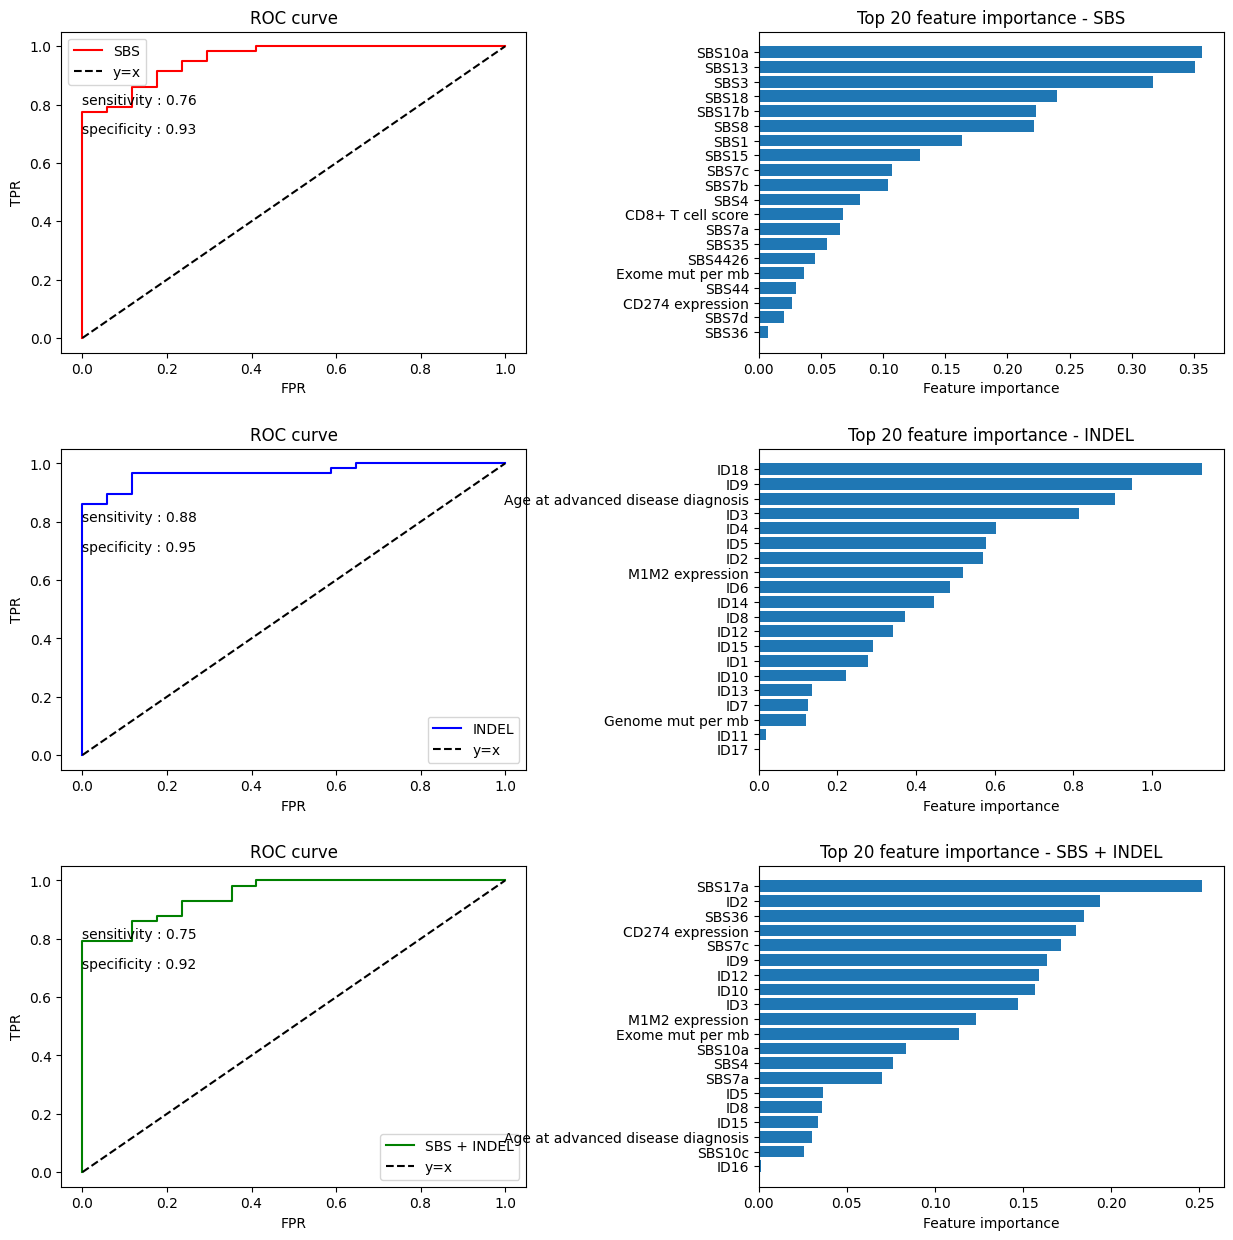

In [19]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
x = np.linspace(0,1,100)

# SBS
# ROC curve
ax[0,0].plot(fpr_sbs, tpr_sbs, color='red',label='SBS')
ax[0,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,0].set_xlabel('FPR')
ax[0,0].set_ylabel('TPR')
ax[0,0].set_title('ROC curve')
ax[0,0].text(0,0.8,f"sensitivity : {sensitivity_sbs}")
ax[0,0].text(0,0.7,f"specificity : {specificity_sbs}")
ax[0,0].legend()

# Feature importance
ax[0,1].barh(features_name_sorted_sbs[:20],features_importance_sorted_sbs[:20])
ax[0,1].set_xlabel("Feature importance")
ax[0,1].set_title("Top 20 feature importance - SBS")

# INDEL
# ROC curve
ax[1,0].plot(fpr_indel, tpr_indel, color='blue',label='INDEL')
ax[1,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[1,0].set_xlabel('FPR')
ax[1,0].set_ylabel('TPR')
ax[1,0].set_title('ROC curve')
ax[1,0].text(0,0.8,f"sensitivity : {sensitivity_indel}")
ax[1,0].text(0,0.7,f"specificity : {specificity_indel}")
ax[1,0].legend()

# Feature importance
ax[1,1].barh(features_name_sorted_indel[0:20],features_importance_sorted_indel[0:20])
ax[1,1].set_xlabel("Feature importance")
ax[1,1].set_title("Top 20 feature importance - INDEL")

# SBS + INDEL
# ROC curve
ax[2,0].plot(fpr_comb, tpr_comb, color='green',label='SBS + INDEL')
ax[2,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[2,0].set_xlabel('FPR')
ax[2,0].set_ylabel('TPR')
ax[2,0].set_title('ROC curve')
ax[2,0].text(0,0.8,f"sensitivity : {sensitivity_comb}")
ax[2,0].text(0,0.7,f"specificity : {specificity_comb}")
ax[2,0].legend()

# Feature importance
ax[2,1].barh(features_name_sorted_comb[0:20],features_importance_sorted_comb[0:20])
ax[2,1].set_xlabel("Feature importance")
ax[2,1].set_title("Top 20 feature importance - SBS + INDEL")

plt.subplots_adjust(hspace=0.3, wspace=0.5)

### Train loss and validation loss

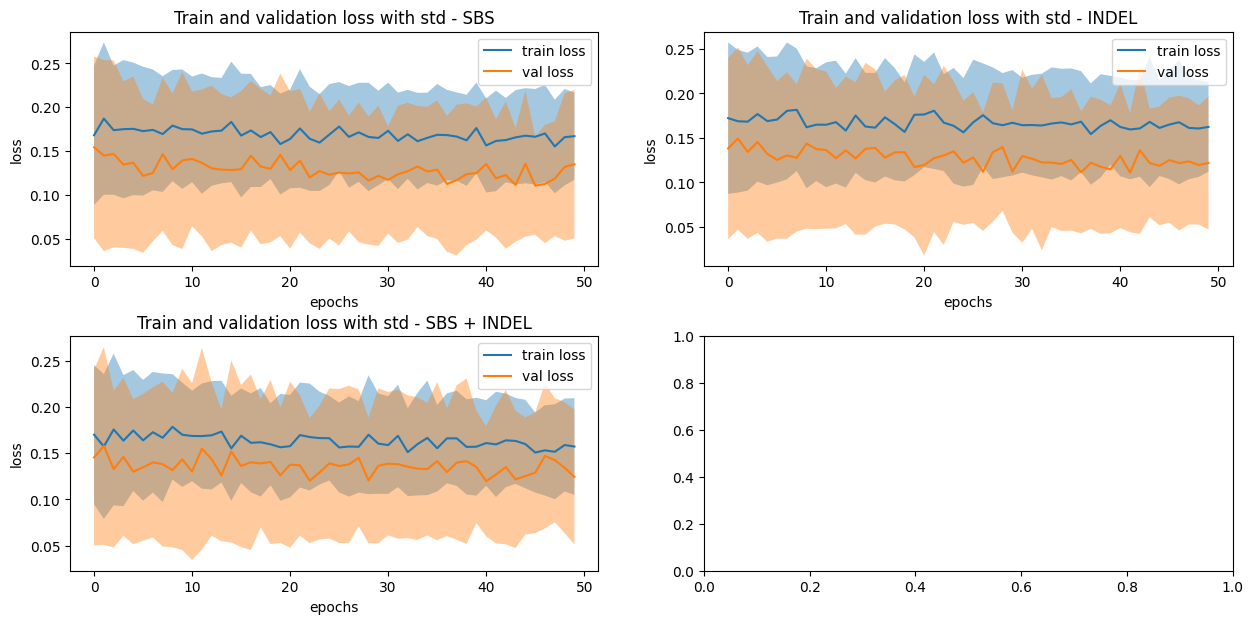

In [17]:
epochs = [k for k in range(n_epochs)]

fig, ax = plt.subplots(2,2,figsize=(15,7))

# SBS :
ax[0,0].plot(epochs, train_loss_sbs,label='train loss')
ax[0,0].fill_between(epochs, train_loss_sbs-std_train_loss_sbs, train_loss_sbs+std_train_loss_sbs, alpha=0.4)
ax[0,0].plot(epochs, val_loss_sbs,label='val loss')
ax[0,0].fill_between(epochs, val_loss_sbs-std_val_loss_sbs, val_loss_sbs+std_val_loss_sbs,alpha=0.4)
ax[0,0].set_xlabel('epochs')
ax[0,0].set_ylabel('loss')
ax[0,0].set_title('Train and validation loss with std - SBS')
ax[0,0].legend()

# INDEL :
ax[0,1].plot(epochs, train_loss_indel,label='train loss')
ax[0,1].fill_between(epochs, train_loss_indel-std_train_loss_indel, train_loss_indel+std_train_loss_indel, alpha=0.4)
ax[0,1].plot(epochs, val_loss_indel,label='val loss')
ax[0,1].fill_between(epochs, val_loss_indel-std_val_loss_indel, val_loss_indel+std_val_loss_indel,alpha=0.4)
ax[0,1].set_xlabel('epochs')
ax[0,1].set_ylabel('loss')
ax[0,1].set_title('Train and validation loss with std - INDEL')
ax[0,1].legend()

# SBS + INDEL :
ax[1,0].plot(epochs, train_loss_comb,label='train loss')
ax[1,0].fill_between(epochs, train_loss_comb-std_train_loss_comb, train_loss_comb+std_train_loss_comb, alpha=0.4)
ax[1,0].plot(epochs, val_loss_comb,label='val loss')
ax[1,0].fill_between(epochs, val_loss_comb-std_val_loss_comb, val_loss_comb+std_val_loss_comb,alpha=0.4)
ax[1,0].set_xlabel('epochs')
ax[1,0].set_ylabel('loss')
ax[1,0].set_title('Train and validation loss with std - SBS + INDEL')
ax[1,0].legend()

plt.subplots_adjust(hspace=0.3)